# Zadanie 1b  
Celem ćwiczeń jest implementacja metody gradientu prostego.

Należy zaimplementować metodę gradientu prostego, służącą do znajdywania minimum lokalnego zadanej funkcji celu:

$$\theta_{t+1}=\theta_{t} - \eta\nabla f(\theta_{t})$$
gdzie:
- $f(\theta_{t})$ to funkcja celu dla której szukamy minimum,
- $\theta_{t}$ to parametry funkcji celu w kroku $t$,
- $\eta$ to współczynnik uczenia definiujący tempo zmiany parametrów (ang. learning rate), który powinien być skalarem o niskiej wartości.

W ćwiczeniu należy zaimplementować tę metodę do znalezienia minimów lokalnych dwóch funkcji (podanych poniżej). Dodatkowo należy przebadać wpływ współczynnika uczenia $\eta$  oraz różnych parametrów początkowych $\theta_{t=0}$ na jakość rozwiązania. Należy zwizualizować proces minimalizacji, czyli pośrednie parametry $\theta_{t}$ na wykresie 2D.

W poniższej implementacji należy uzpełnić metody klasy `SimpleGradientDescent` i użyć ich do realizacji zadania.    
  
## Punktacja:    
 - Implementacja kroku gradientu prostego. **1 pkt**  
 - Przeprowadzenie przeszukiwania minimum na obu funkcjach - poprawny wynik. **1 pkt**  
 - Wizualizacja przeszukiwania z wielu miejsc początkowych i dla różnych wartości $\eta$. **2 pkt**


In [1]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

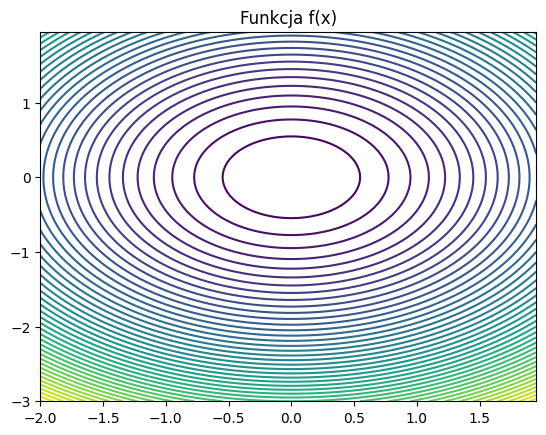

In [2]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.title("Funkcja f(x)")
plt.contour(X, Y, Z, 50)

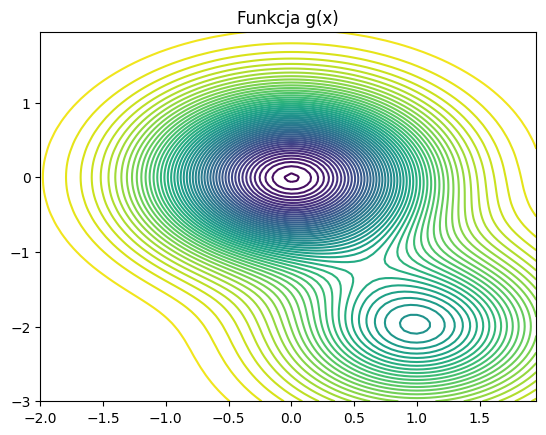

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.title("Funkcja g(x)")
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [4]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(
        self,
        func: Callable[[float, float], float],
        grad_func: Callable[[float, float], Tuple[float, float]],
        alpha: float = 0.1,
    ):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10, color='red')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('Funkcja celu')
        plt.show()

    def calculate_func_vale(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        return np.array([x1, x2]) - self.alpha * np.array(self.calculate_func_grad(x1, x2))

    def minimize(
        self,
        x1_init: float,
        x2_init: float,
        steps: int,
        verbose: bool = False,
        plot: bool = False,
    ) -> float:

        x1, x2 = x1_init, x2_init
        self.trace = np.array([[x1, x2]])

        for i in range(steps+1):
            x1, x2 = self.gradient_descent_step(x1, x2)
            self.trace = np.append(self.trace, [[x1, x2]], axis=0)

            if verbose:
                print(f"Step {i}: x1 = {self.trace[i, 0]:.4f}, x2 = {self.trace[i, 1]:.4f}, f(x) = {self.calculate_func_vale(self.trace[i, 0], self.trace[i, 1]):.4f}")

        if plot:
            self.plot_func()

        return self.calculate_func_vale(x1, x2)


# Rozwiązanie

## Funkcja 1

In [5]:
def func_f(x, y):
    return x**2 + y**2

def grad_func_f(x, y):
    return 2*x, 2*y

**Próba nr. 1**

*   Punkt początkowy: (0, 2)
*   α: 0.1
*   ilość kroków: 100









---



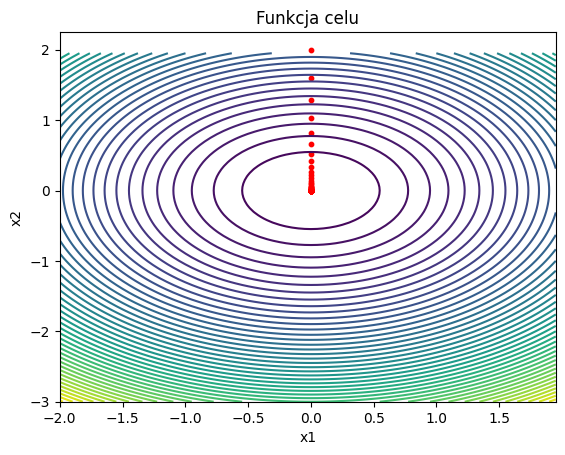

Obliczona wartość funkcji w minimum lokalnym: 1.062275985633536e-19, rzeczywista wartość funkcji w minimum lokalnym: 0, błąd: -1.062275985633536e-19


In [6]:
optimizer_f = SimpleGradientDescent(func=func_f, grad_func=grad_func_f, alpha=0.1)
result_f = optimizer_f.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_f}, rzeczywista wartość funkcji w minimum lokalnym: {func_f(0,0)}, błąd: {func_f(0,0) - result_f}")

**Zmiana parametrów początkowych**
*   Punkt początkowy: (1, 1)
*   α: 0.1
*   ilość kroków: 100

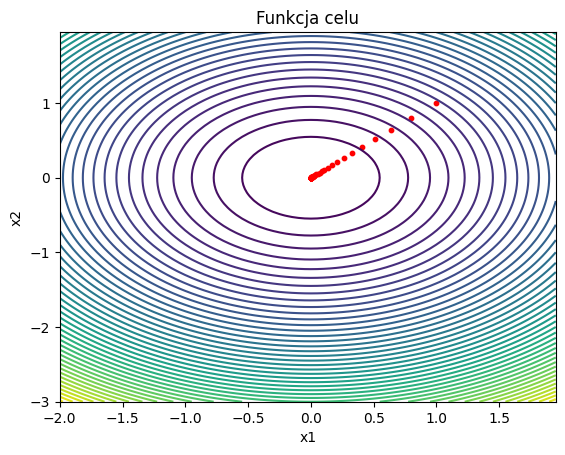

Obliczona wartość funkcji w minimum lokalnym: 5.31137992816768e-20, rzeczywista wartość funkcji w minimum lokalnym: 0, błąd: -5.31137992816768e-20


In [7]:
optimizer_f = SimpleGradientDescent(func=func_f, grad_func=grad_func_f, alpha=0.1)
result_f = optimizer_f.minimize(x1_init=1, x2_init=1, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_f}, rzeczywista wartość funkcji w minimum lokalnym: {func_f(0,0)}, błąd: {func_f(0,0) - result_f}")

*   Punkt początkowy: (-1, -2)
*   α: 0.1
*   ilość kroków: 100

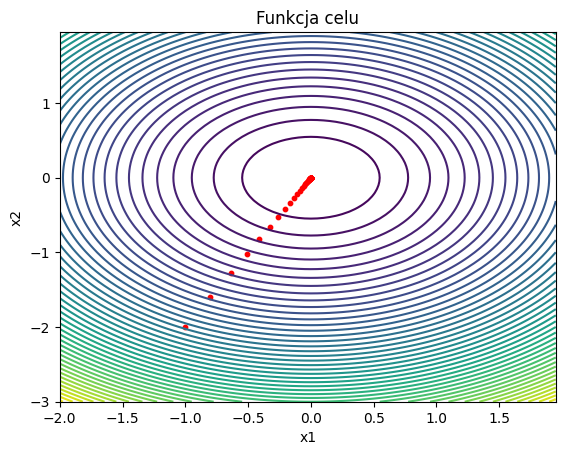

Obliczona wartość funkcji w minimum lokalnym: 1.32784498204192e-19, rzeczywista wartość funkcji w minimum lokalnym: 0, błąd: -1.32784498204192e-19


In [8]:
optimizer_f = SimpleGradientDescent(func=func_f, grad_func=grad_func_f, alpha=0.1)
result_f = optimizer_f.minimize(x1_init=-1, x2_init=-2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_f}, rzeczywista wartość funkcji w minimum lokalnym: {func_f(0,0)}, błąd: {func_f(0,0) - result_f}")

**Zmiana współczynnika uczenia**
*   Punkt początkowy: (0, 2)
*   α: 0.3
*   ilość kroków: 100

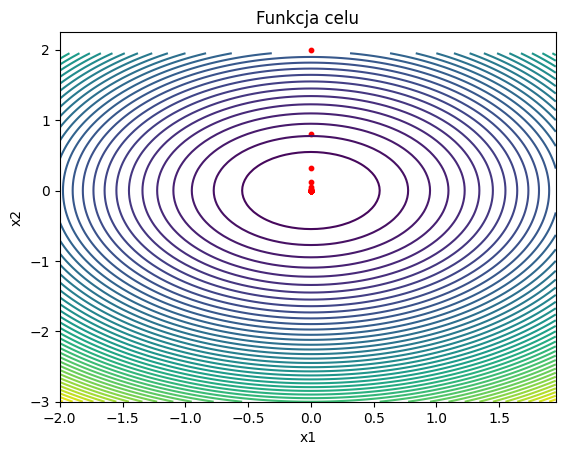

Obliczona wartość funkcji w minimum lokalnym: 1.652639921975639e-80, rzeczywista wartość funkcji w minimum lokalnym: 0, błąd: -1.652639921975639e-80


In [9]:
optimizer_f = SimpleGradientDescent(func=func_f, grad_func=grad_func_f, alpha=0.3)
result_f = optimizer_f.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_f}, rzeczywista wartość funkcji w minimum lokalnym: {func_f(0,0)}, błąd: {func_f(0,0) - result_f}")

*   Punkt początkowy: (0, 2)
*   α: 0.6
*   ilość kroków: 100

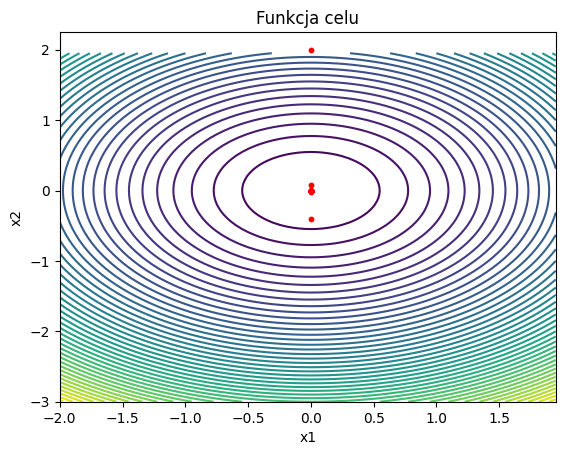

Obliczona wartość funkcji w minimum lokalnym: 2.5711008708142762e-141, rzeczywista wartość funkcji w minimum lokalnym: 0, błąd: -2.5711008708142762e-141


In [10]:
optimizer_f = SimpleGradientDescent(func=func_f, grad_func=grad_func_f, alpha=0.6)
result_f = optimizer_f.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_f}, rzeczywista wartość funkcji w minimum lokalnym: {func_f(0,0)}, błąd: {func_f(0,0) - result_f}")

*   Punkt początkowy: (0, 2)
*   α: 1
*   ilość kroków: 100

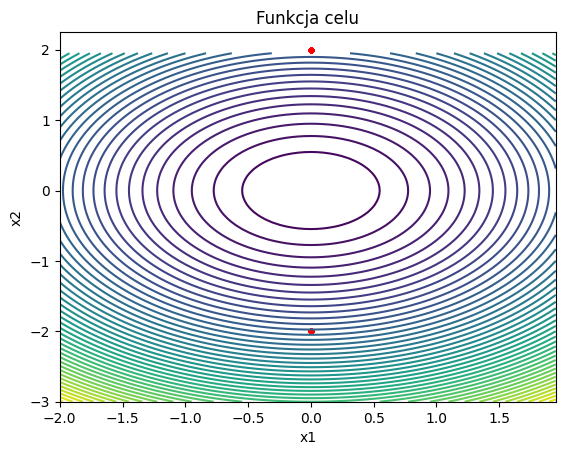

Obliczona wartość funkcji w minimum lokalnym: 4, rzeczywista wartość funkcji w minimum lokalnym: 0, błąd: -4


In [11]:
optimizer_f = SimpleGradientDescent(func=func_f, grad_func=grad_func_f, alpha=1)
result_f = optimizer_f.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_f}, rzeczywista wartość funkcji w minimum lokalnym: {func_f(0,0)}, błąd: {func_f(0,0) - result_f}")

***Wnioski***

Algorytm skutecznie znajduje minimum lokalne funkcji, znajdujące się w punkcie (0,0), osiągając w pierwszym przypadku ostateczną wartość 1.062275985633536e-19.

Zmiana punktów początkowych przy badanej funkcji nie wpływa znacząco na rozwiązanie - algorytm prawidłowo znajduje minimum lokalne. Zmiana punktu początkowego może w tym przypadku jedynie sprawić, że algorytm szybciej znajdzie szukane minimum, ponieważ będzie startował z punktu, który jest bliżej minimum.

Większy wpływ ma w tym przypadku zmiana współczynnika uczenia. Jego zmiana na wartości 0.3 oraz 0.6 sprawia, że algorytm znacznie szybciej znajduje minimum lokalne i potrzebuje mniejszej liczby kroków, aby je osiągnąć. Jednak zbyt duże zwiększenie parametru α sprawia, że algorytm nie znajduje minimum lokalnego i zaczyna wokół niego oscylować. Dla wartości α = 1, po stu krokach algorytm kończy poszukiwania minimum w punkcie (0,-2), osiągając przy tym wartość funkcji równą 4.



## Funkcja 2

In [12]:
def func_g(x, y):
    return 1.5-np.exp(-x**2-y**2)-0.5*np.exp(-(x-1)**2-(y+2)**2)

def grad_func_g(x, y):
    return 2*x*np.exp(-x**2-y**2)+(x-1)*np.exp(-(x-1)**2-(y+2)**2), 2*y*np.exp(-x**2-y**2)+(y+2)*np.exp(-(x-1)**2-(y+2)**2)

**Próba nr. 1**

*   Punkt początkowy: (0, 2)
*   α: 0.1
*   ilość kroków: 100

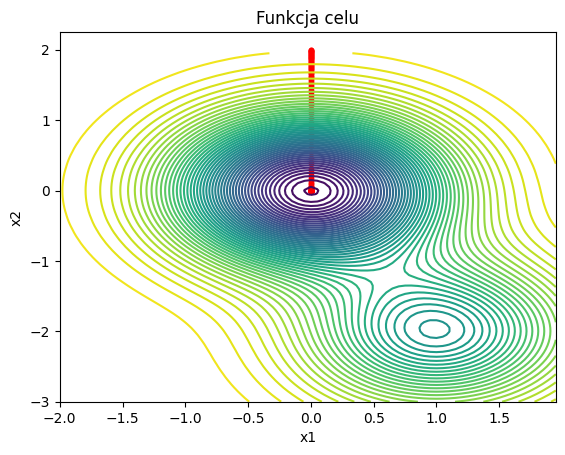

Obliczona wartość funkcji w minimum lokalnym: 0.496572483849215, rzeczywista wartość funkcji w minimum lokalnym: 0.49663102650045726, błąd: 5.854265124227709e-05


In [13]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.1)
result_g = optimizer_g.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0,0)}, błąd: {func_g(0,0) - result_g}")

**Zmiana parametrów początkowych**
*   Punkt początkowy: (-1.5, 0)
*   α: 0.1
*   ilość kroków: 100

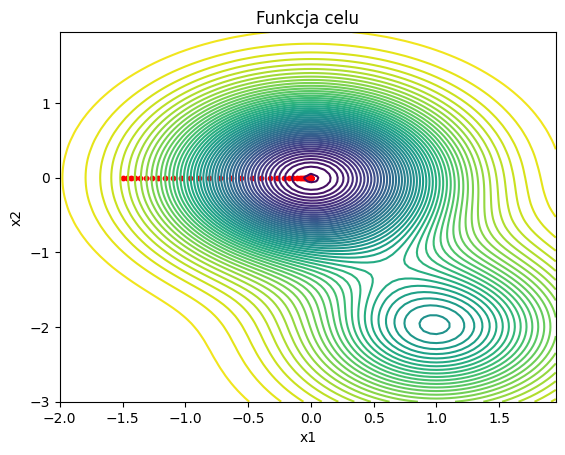

Obliczona wartość funkcji w minimum lokalnym: 0.49657248367634166, rzeczywista wartość funkcji w minimum lokalnym: 0.49663102650045726, błąd: 5.854282411560385e-05


In [14]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.1)
result_g = optimizer_g.minimize(x1_init=-1.5, x2_init=0, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0,0)}, błąd: {func_g(0,0) - result_g}")

*   Punkt początkowy: (1, -1)
*   α: 0.1
*   ilość kroków: 100

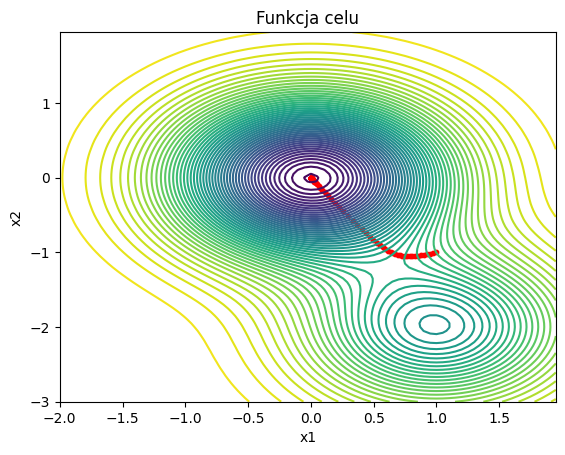

Obliczona wartość funkcji w minimum lokalnym: 0.4965724836763646, rzeczywista wartość funkcji w minimum lokalnym: 0.49663102650045726, błąd: 5.854282409267775e-05


In [15]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.1)
result_g = optimizer_g.minimize(x1_init=1, x2_init=-1, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0,0)}, błąd: {func_g(0,0) - result_g}")

*   Punkt początkowy: (1, -3)
*   α: 0.1
*   ilość kroków: 100

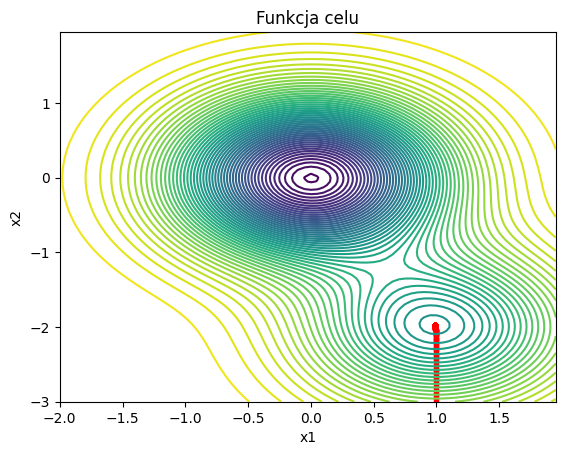

Obliczona wartość funkcji w minimum lokalnym: 0.9927420920226764, rzeczywista wartość funkcji w minimum lokalnym: 0.9927420922402779, błąd: 2.1760149238048143e-10


In [16]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.1)
result_g = optimizer_g.minimize(x1_init=1, x2_init=-3, steps=200, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0.9845, -1.9690)}, błąd: {func_g(0.9845, -1.9690) - result_g}")

*   Punkt początkowy: (1.5, -2)
*   α: 0.1
*   ilość kroków: 100

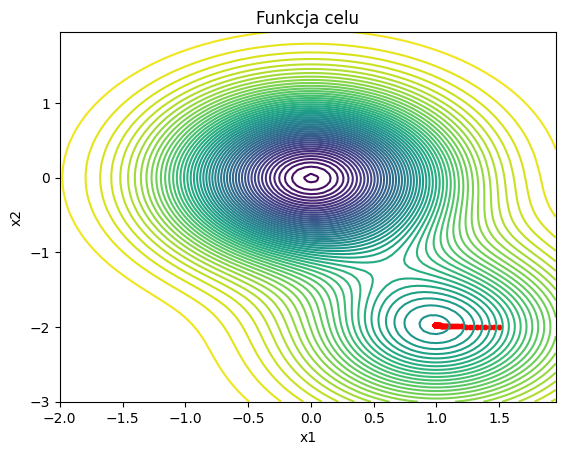

Obliczona wartość funkcji w minimum lokalnym: 0.9927420924909403, rzeczywista wartość funkcji w minimum lokalnym: 0.9927420922402779, błąd: -2.506623797415841e-10


In [17]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.1)
result_g = optimizer_g.minimize(x1_init=1.5, x2_init=-2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0.9845, -1.9690)}, błąd: {func_g(0.9845, -1.9690) - result_g}")

**Zmiana współczynnika uczenia przy punkcie początkowym (0,2)**
*   Punkt początkowy: (0, 2)
*   α: 0.3
*   ilość kroków: 100

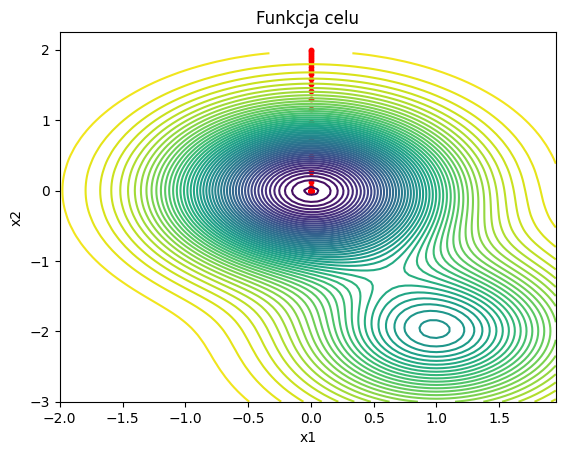

Obliczona wartość funkcji w minimum lokalnym: 0.4965724836763416, rzeczywista wartość funkcji w minimum lokalnym: 0.49663102650045726, błąd: 5.8542824115659364e-05


In [18]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.3)
result_g = optimizer_g.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0,0)}, błąd: {func_g(0,0) - result_g}")

*   Punkt początkowy: (0, 2)
*   α: 0.6
*   ilość kroków: 100

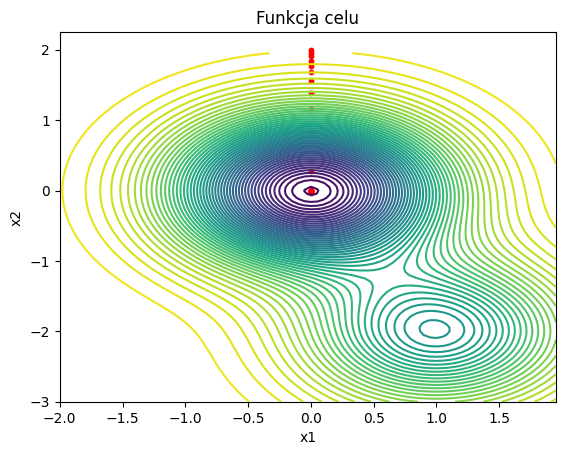

Obliczona wartość funkcji w minimum lokalnym: 0.4965724836763416, rzeczywista wartość funkcji w minimum lokalnym: 0.49663102650045726, błąd: 5.8542824115659364e-05


In [19]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.6)
result_g = optimizer_g.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0,0)}, błąd: {func_g(0,0) - result_g}")

*   Punkt początkowy: (0, 2)
*   α: 1
*   ilość kroków: 100

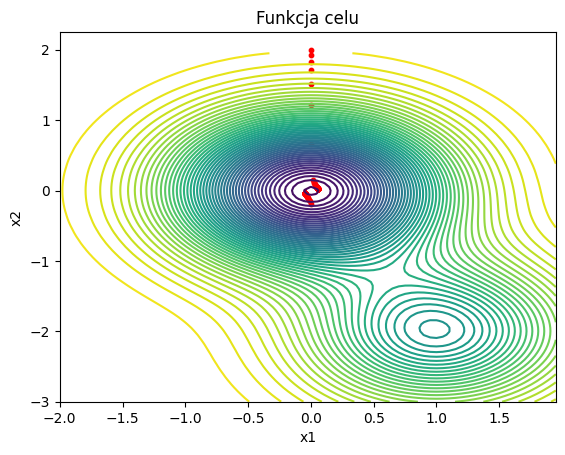

Obliczona wartość funkcji w minimum lokalnym: 0.5001475453324251, rzeczywista wartość funkcji w minimum lokalnym: 0.49663102650045726, błąd: -0.003516518831967852


In [20]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=1)
result_g = optimizer_g.minimize(x1_init=0, x2_init=2, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0,0)}, błąd: {func_g(0,0) - result_g}")

**Zmiana współczynnika uczenia przy punkcie początkowym (1,-3)**
*   Punkt początkowy: (1, -3)
*   α: 0.3
*   ilość kroków: 100

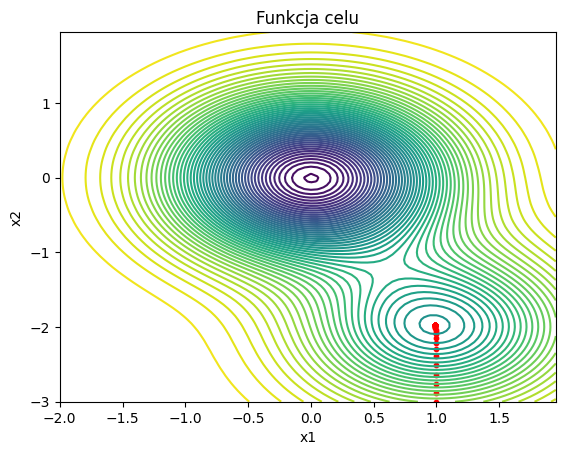

Obliczona wartość funkcji w minimum lokalnym: 0.9927420920226762, rzeczywista wartość funkcji w minimum lokalnym: 0.9927420922402779, błąd: 2.1760171442508636e-10


In [21]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.3)
result_g = optimizer_g.minimize(x1_init=1, x2_init=-3, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0.9845, -1.9690)}, błąd: {func_g(0.9845, -1.9690) - result_g}")

*   Punkt początkowy: (1, -3)
*   α: 0.6
*   ilość kroków: 100

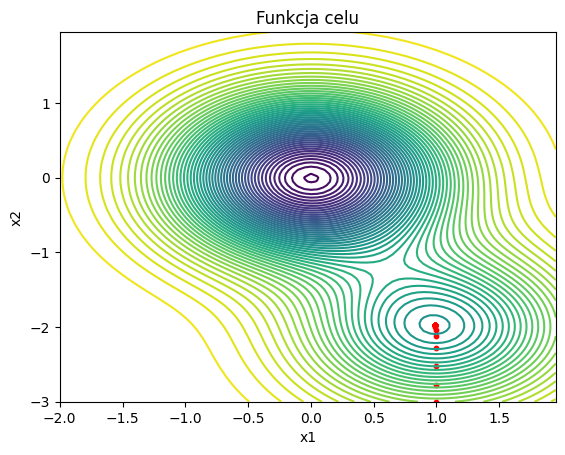

Obliczona wartość funkcji w minimum lokalnym: 0.9927420920226762, rzeczywista wartość funkcji w minimum lokalnym: 0.9927420922402779, błąd: 2.1760171442508636e-10


In [22]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=0.6)
result_g = optimizer_g.minimize(x1_init=1, x2_init=-3, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0.9845, -1.9690)}, błąd: {func_g(0.9845, -1.9690) - result_g}")

*   Punkt początkowy: (1, -3)
*   α: 1
*   ilość kroków: 100

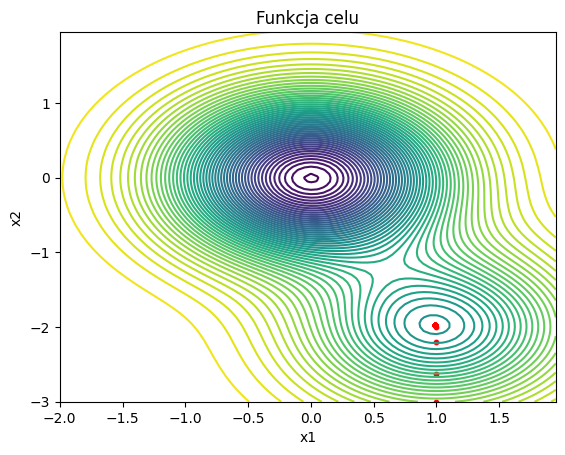

Obliczona wartość funkcji w minimum lokalnym: 0.9927420920226762, rzeczywista wartość funkcji w minimum lokalnym: 0.9927420922402779, błąd: 2.1760171442508636e-10


In [23]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=1)
result_g = optimizer_g.minimize(x1_init=1, x2_init=-3, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0.9845, -1.9690)}, błąd: {func_g(0.9845, -1.9690) - result_g}")

*   Punkt początkowy: (1, -3)
*   α: 2
*   ilość kroków: 100

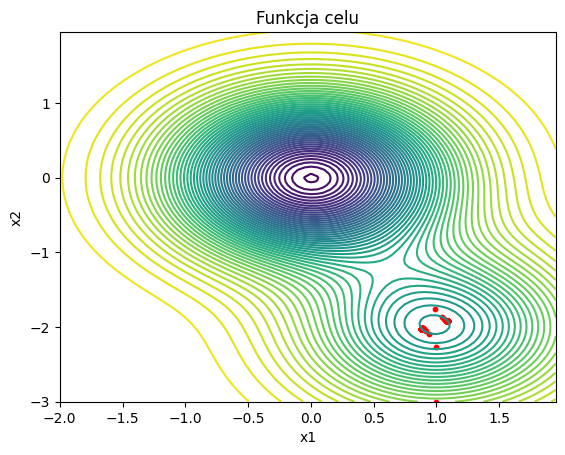

Obliczona wartość funkcji w minimum lokalnym: 0.9999869861845712, rzeczywista wartość funkcji w minimum lokalnym: 0.9927420922402779, błąd: -0.007244893944293285


In [24]:
optimizer_g = SimpleGradientDescent(func=func_g, grad_func=grad_func_g, alpha=2)
result_g = optimizer_g.minimize(x1_init=1, x2_init=-3, steps=100, verbose=False, plot=True)
print(f"Obliczona wartość funkcji w minimum lokalnym: {result_g}, rzeczywista wartość funkcji w minimum lokalnym: {func_g(0.9845, -1.9690)}, błąd: {func_g(0.9845, -1.9690) - result_g}")

***Wnioski***

Funkcja *g*, w przeciwieństwie do funkcji *f* posiada dwa minima lokalne, w tym jedno globalne. Algorytm skutecznie znajduje minimum lokalne, bądź minimum globalne funkcji w zależności od punktu początkowego.

W tym przypadku również znaczący wpływ ma zmiana współczynnika uczenia. Jego zmiana na wartości 0.3 oraz 0.6 w punkcie początkowym (0,2) także sprawia, że algorytm znacznie szybciej znajduje minimum lokalne i potrzebuje mniejszej liczby kroków, aby je osiągnąć. Dla wartości α = 1 algorytm oscyluje wokół minimum globalnego i po stu krokach osiąga punkt końcowy (0.0569, 0.0199).

W przypadku minimum lokalnego w punkcie (0.9845, -1.9690) zmiana wartości współczynnika uczenia wpływa na algorytm podobnie, jednak algorytm działa poprawnie również dla α=1. α=2 powoduje jednak oscylacje, tak samo jak w przypadku innego badanego punktu początkowego. Dzieje się tak, ponieważ lokalne minimum ma względnie „łagodny” spadek wokół siebie, co widać na przedstawionym wykresie. Z kolei minimum globalne funkcji znajduje się w miejscu, gdzie krajobraz funkcji jest bardziej stromy, co może prowadzić do oscylacji przy większych wartościach współczynnika uczenia.